# **Sample report coding**

## **Prep**

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [43]:
session_event = pd.read_csv('session events.csv')## in your case it may be year_7_english__session_events
session_info = pd.read_csv('session info.csv')
session_info.head()

,Unnamed: 0,session_id,scheduled_start,scheduled_finish,package_code,package_mastercode,subject,year_level,status,discipline,type,student_customer_number,tutor_customer_number
0,0,a8D3s000000pjPyEAI_0,2021-03-18 06:30:00,2021-03-18 07:30:00,a8B3s0000000T8EEAU,Course370,Mathematics,Year 7,complete,Mathematics,individual,S63343606,T24766764
1,1,a8D3s000000ohwiEAA_0,2021-03-19 22:00:00,2021-03-19 23:00:00,a8B3s0000000NEuEAM,Course370,Mathematics,Year 7,complete,Mathematics,individual,S42591370,T14148666
2,2,a8D3s00000058AlEAI_0,2021-03-21 01:30:00,2021-03-21 02:30:00,a8B3s0000004No8EAE,Course144,Mathematics,Year 7,complete,Mathematics,individual,S06850077,T02450715
3,3,a8D3s000000patIEAQ_0,2021-03-17 06:30:00,2021-03-17 07:30:00,a8B3s0000000SVHEA2,Course370,Mathematics,Year 7,complete,Mathematics,individual,S09189030,T92219074
4,4,a8D3s000000pT80EAE_0,2021-03-22 05:30:00,2021-03-22 06:30:00,a8B3s0000000S5OEAU,Course370,Mathematics,Year 7,complete,Mathematics,individual,S91703271,T45788990


**student_session_event** will contain **all sessions** done by student S42591370 after applying code below.

In [44]:
student_session_info = session_info[session_info['student_customer_number'] == 'S42591370']
sessions = student_session_info['session_id'].unique()
student_session_event = pd.DataFrame()
for i in sessions:
    student_session_event = student_session_event.append(session_event[session_event['session_id'] == i])
student_session_event = student_session_event.dropna(subset = ['tutor_audio','student_audio','correct'])
student_session_event['engagement'] = student_session_event['student_audio']/(student_session_event['tutor_audio'] + student_session_event['student_audio'])
student_session_event['influence'] = student_session_event['tutor_audio']/(student_session_event['tutor_audio'] + student_session_event['student_audio'])
student_session_event

,Unnamed: 0,session_id,event,start,finish,duration,step_id,content_id,correct,nuance,concept_id,content_type,question_type,student_cursor,student_audio,tutor_cursor,tutor_audio,engagement,influence
6969,6969,a8D3s00000066QvEAI_0,Question Submitted,2021-04-17 00:06:39.095857,2021-04-17 00:12:34.432552,0 days 00:05:55.336695000,64937.0,163566,1.0,NaN,13965,1,1.0,0.014,0.166,0.454,0.335,0.331337,0.668663
6970,6970,a8D3s00000066QvEAI_0,Question Submitted,2021-04-17 00:12:37.984322,2021-04-17 00:15:35.810983,0 days 00:02:57.826661000,64937.0,163618,1.0,NaN,13965,1,1.0,0.258,0.388,0.326,0.230,0.627832,0.372168
6971,6971,a8D3s00000066QvEAI_0,Question Submitted,2021-04-17 00:15:37.163096,2021-04-17 00:16:31.341211,0 days 00:00:54.178115000,64937.0,164027,1.0,NaN,13965,1,2.0,0.574,0.444,0.074,0.056,0.888000,0.112000
6972,6972,a8D3s00000066QvEAI_0,Question Submitted,2021-04-17 00:16:41.612751,2021-04-17 00:19:07.665185,0 days 00:02:26.052434000,64939.0,163541,0.0,NaN,13970,1,6.0,0.123,0.370,0.233,0.301,0.551416,0.448584
6973,6973,a8D3s00000066QvEAI_0,Question Submitted,2021-04-17 00:19:21.423128,2021-04-17 00:23:16.142994,0 days 00:03:54.719866000,64939.0,163543,1.0,NaN,13970,1,4.0,0.315,0.332,0.294,0.230,0.590747,0.409253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9224,9224,a8D3s000000ohwoEAA_0,Question Submitted,2021-04-28 10:40:22.122916,2021-04-28 10:44:12.217977,0 days 00:03:50.095061000,64953.0,161661,1.0,NaN,13921,1,1.0,0.252,0.178,0.261,0.239,0.426859,0.573141
9225,9225,a8D3s000000ohwoEAA_0,Question Submitted,2021-04-28 10:44:13.639976,2021-04-28 10:45:26.687130,0 days 00:01:13.047154000,64953.0,161662,1.0,NaN,13921,1,4.0,0.342,0.151,0.055,0.123,0.551095,0.448905
9226,9226,a8D3s000000ohwoEAA_0,Question Submitted,2021-04-28 10:45:32.905214,2021-04-28 10:48:53.744116,0 days 00:03:20.838902000,64955.0,163562,1.0,NaN,13966,1,1.0,0.040,0.373,0.119,0.219,0.630068,0.369932
9227,9227,a8D3s000000ohwoEAA_0,Question Submitted,2021-04-28 10:48:57.028077,2021-04-28 10:52:06.020371,0 days 00:03:08.992294000,64955.0,163563,1.0,NaN,13966,1,1.0,0.000,0.344,0.519,0.381,0.474483,0.525517


**peer_session_event** will contain other students' performance (only the concepts student S42591370 has covered during his time with cluey) after applying the code below.
**peer_session_event**  can be used as a peer comparison

In [46]:
concepts = student_session_event['concept_id'].unique()
peer_session_event = pd.DataFrame()
for i in concepts:
    peer_session_event = peer_session_event.append(session_event[session_event['concept_id'] == i])
peer_session_event = peer_session_event.dropna(subset = ['tutor_audio','student_audio','correct'])
peer_session_event['engagement'] = peer_session_event['student_audio']/(peer_session_event['tutor_audio'] + peer_session_event['student_audio'])
peer_session_event['influence'] = peer_session_event['tutor_audio']/(peer_session_event['tutor_audio'] + peer_session_event['student_audio'])
peer_session_event

,Unnamed: 0,session_id,event,start,finish,duration,step_id,content_id,correct,nuance,concept_id,content_type,question_type,student_cursor,student_audio,tutor_cursor,tutor_audio,engagement,influence
339,339,a8D3s0000000pgtEAA_0,Practice Review,2021-04-16 07:21:29.465325,2021-04-16 07:22:28.339041,0 days 00:00:58.873716000,64937.0,167164,0.0,review,13965,1,4.0,0.085,0.017,0.220,0.407,0.040094,0.959906
471,471,a8D3s000000129aEAA_0,Practice Review,2021-05-03 09:23:34.789557,2021-05-03 09:23:56.105548,0 days 00:00:21.315991000,64937.0,175000,0.0,submitted,13965,1,2.0,0.364,0.000,0.273,0.000,NaN,NaN
472,472,a8D3s000000129aEAA_0,Practice Feedback,2021-05-03 09:23:56.105548,2021-05-03 09:24:52.824669,0 days 00:00:56.719121000,64937.0,175000,0.0,NaN,13965,1,2.0,0.054,0.054,0.536,0.250,0.177632,0.822368
610,610,a8D3s00000014VXEAY_0,Example,2021-04-27 08:11:59.361226,2021-04-27 08:14:33.507754,0 days 00:02:34.146528000,64936.0,312187,0.0,NaN,13965,2,NaN,0.558,0.201,0.773,0.578,0.258023,0.741977
611,611,a8D3s00000014VXEAY_0,Question Submitted,2021-04-27 08:16:01.088662,2021-04-27 08:16:26.349503,0 days 00:00:25.260841000,64937.0,164027,1.0,NaN,13965,1,2.0,0.000,0.240,0.000,0.000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15431,15431,a8D3s000000qVBIEA2_1,Question Submitted,2021-04-27 10:11:16.115413,2021-04-27 10:13:50.422172,0 days 00:02:34.306759000,64955.0,183147,1.0,NaN,13966,1,1.0,0.409,0.247,0.188,0.175,0.585308,0.414692
15432,15432,a8D3s000000qVBIEA2_1,Question Submitted,2021-04-27 10:14:04.588391,2021-04-27 10:16:07.884822,0 days 00:02:03.296431000,64955.0,180287,1.0,NaN,13966,1,4.0,0.187,0.366,0.049,0.114,0.762500,0.237500
15535,15535,a8D3s000000qYe1EAE_0,Practice Review,2021-05-10 06:18:36.653584,2021-05-10 06:18:52.530860,0 days 00:00:15.877276000,64955.0,171026,0.0,submitted,13966,1,1.0,0.000,0.000,0.125,0.125,0.000000,1.000000
15536,15536,a8D3s000000qYe1EAE_0,Practice Feedback,2021-05-10 06:18:52.530860,2021-05-10 06:19:03.797097,0 days 00:00:11.266237000,64955.0,171026,0.0,NaN,13966,1,1.0,0.091,0.091,0.455,0.364,0.200000,0.800000


## **Sample session report**

#### Analysis student's preformance in a random session

**stu_samp_session** will contain correct/engagement

In [28]:
stu_samp_session = student_session_event[student_session_event['session_id'] == 'a8D3s00000066QvEAI_0']
stu_samp_session

,Unnamed: 0,session_id,event,start,finish,duration,step_id,content_id,correct,nuance,concept_id,content_type,question_type,student_cursor,student_audio,tutor_cursor,tutor_audio,engagement,influence
6969,6969,a8D3s00000066QvEAI_0,Question Submitted,2021-04-17 00:06:39.095857,2021-04-17 00:12:34.432552,0 days 00:05:55.336695000,64937.0,163566,1.0,NaN,13965,1,1.0,0.014,0.166,0.454,0.335,0.331337,0.668663
6970,6970,a8D3s00000066QvEAI_0,Question Submitted,2021-04-17 00:12:37.984322,2021-04-17 00:15:35.810983,0 days 00:02:57.826661000,64937.0,163618,1.0,NaN,13965,1,1.0,0.258,0.388,0.326,0.230,0.627832,0.372168
6971,6971,a8D3s00000066QvEAI_0,Question Submitted,2021-04-17 00:15:37.163096,2021-04-17 00:16:31.341211,0 days 00:00:54.178115000,64937.0,164027,1.0,NaN,13965,1,2.0,0.574,0.444,0.074,0.056,0.888000,0.112000
6972,6972,a8D3s00000066QvEAI_0,Question Submitted,2021-04-17 00:16:41.612751,2021-04-17 00:19:07.665185,0 days 00:02:26.052434000,64939.0,163541,0.0,NaN,13970,1,6.0,0.123,0.370,0.233,0.301,0.551416,0.448584
6973,6973,a8D3s00000066QvEAI_0,Question Submitted,2021-04-17 00:19:21.423128,2021-04-17 00:23:16.142994,0 days 00:03:54.719866000,64939.0,163543,1.0,NaN,13970,1,4.0,0.315,0.332,0.294,0.230,0.590747,0.409253
6974,6974,a8D3s00000066QvEAI_0,Question Submitted,2021-04-17 00:25:08.374033,2021-04-17 00:27:02.882825,0 days 00:01:54.508792000,64939.0,163544,1.0,NaN,13970,1,4.0,0.675,0.149,0.114,0.202,0.424501,0.575499
6975,6975,a8D3s00000066QvEAI_0,Question Submitted,2021-04-17 00:29:48.379270,2021-04-17 00:34:17.080250,0 days 00:04:28.700980000,64939.0,163546,0.0,NaN,13970,1,4.0,0.301,0.305,0.275,0.249,0.550542,0.449458
6976,6976,a8D3s00000066QvEAI_0,Question Submitted,2021-04-17 00:34:49.707483,2021-04-17 00:43:13.454018,0 days 00:08:23.746535000,64939.0,169471,1.0,NaN,13970,1,4.0,0.254,0.308,0.202,0.181,0.629857,0.370143
6977,6977,a8D3s00000066QvEAI_0,Question Submitted,2021-04-17 00:43:37.064389,2021-04-17 00:44:24.276233,0 days 00:00:47.211844000,64941.0,163100,1.0,NaN,13957,1,4.0,0.000,0.319,0.000,0.064,0.832898,0.167102
6978,6978,a8D3s00000066QvEAI_0,Question Submitted,2021-04-17 00:44:25.535714,2021-04-17 00:44:48.536575,0 days 00:00:23.000861000,64941.0,163101,1.0,NaN,13957,1,4.0,0.000,0.609,0.000,0.000,1.000000,0.000000


In [47]:
concept_session = stu_samp_session['concept_id'].unique()
peer_samp_session = pd.DataFrame()
for i in concept_session:
    peer_samp_session = peer_samp_session.append(peer_session_event[peer_session_event['concept_id'] == i])
peer_samp_session
    
    

,Unnamed: 0,session_id,event,start,finish,duration,step_id,content_id,correct,nuance,concept_id,content_type,question_type,student_cursor,student_audio,tutor_cursor,tutor_audio,engagement,influence
339,339,a8D3s0000000pgtEAA_0,Practice Review,2021-04-16 07:21:29.465325,2021-04-16 07:22:28.339041,0 days 00:00:58.873716000,64937.0,167164,0.0,review,13965,1,4.0,0.085,0.017,0.220,0.407,0.040094,0.959906
471,471,a8D3s000000129aEAA_0,Practice Review,2021-05-03 09:23:34.789557,2021-05-03 09:23:56.105548,0 days 00:00:21.315991000,64937.0,175000,0.0,submitted,13965,1,2.0,0.364,0.000,0.273,0.000,NaN,NaN
472,472,a8D3s000000129aEAA_0,Practice Feedback,2021-05-03 09:23:56.105548,2021-05-03 09:24:52.824669,0 days 00:00:56.719121000,64937.0,175000,0.0,NaN,13965,1,2.0,0.054,0.054,0.536,0.250,0.177632,0.822368
610,610,a8D3s00000014VXEAY_0,Example,2021-04-27 08:11:59.361226,2021-04-27 08:14:33.507754,0 days 00:02:34.146528000,64936.0,312187,0.0,NaN,13965,2,NaN,0.558,0.201,0.773,0.578,0.258023,0.741977
611,611,a8D3s00000014VXEAY_0,Question Submitted,2021-04-27 08:16:01.088662,2021-04-27 08:16:26.349503,0 days 00:00:25.260841000,64937.0,164027,1.0,NaN,13965,1,2.0,0.000,0.240,0.000,0.000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15319,15319,a8D3s000000qQquEAE_0,Practice Review,2021-03-29 06:15:24.385948,2021-03-29 06:18:37.053293,0 days 00:03:12.667345000,64943.0,167181,0.0,review,13979,1,4.0,0.005,0.067,0.560,0.539,0.110561,0.889439
15354,15354,a8D3s000000qSGjEAM_0,Question Submitted,2021-05-01 07:47:23.490953,2021-05-01 07:48:47.403761,0 days 00:01:23.912808000,64943.0,163599,1.0,NaN,13979,1,4.0,0.452,0.262,0.286,0.464,0.360882,0.639118
15355,15355,a8D3s000000qSGjEAM_0,Question Submitted,2021-05-01 07:48:48.850992,2021-05-01 07:49:09.675875,0 days 00:00:20.824883000,64943.0,163602,1.0,NaN,13979,1,4.0,0.000,0.000,0.000,0.286,0.000000,1.000000
15356,15356,a8D3s000000qSGjEAM_0,Question Submitted,2021-05-01 07:49:10.944081,2021-05-01 07:50:01.770496,0 days 00:00:50.826415000,64943.0,173897,1.0,NaN,13979,1,4.0,0.275,0.098,0.333,0.490,0.166667,0.833333


#### Calculate session-based correct performance

**student overall correct score**

In [37]:
stu_samp_session.groupby(['session_id']).correct.mean()

session_id
a8D3s00000066QvEAI_0    0.894737
Name: correct, dtype: float64

**student concept-wise score**

In [38]:
stu_samp_session.groupby(['concept_id']).correct.mean()

concept_id
13957    1.0
13965    1.0
13970    0.6
13979    1.0
Name: correct, dtype: float64

**peer overall correct score**

In [49]:
peer_samp_session.correct.mean()

0.680998613037448

**peer concept-wise score**

In [48]:
peer_samp_session.groupby(['concept_id']).correct.mean()

concept_id
13957    0.657957
13965    0.625954
13970    0.742857
13979    0.715827
Name: correct, dtype: float64

#### Calculate session-based engagement performance

**student overall score**

In [50]:
stu_samp_session.groupby(['session_id']).engagement.mean()

session_id
a8D3s00000066QvEAI_0    0.705283
Name: engagement, dtype: float64

**student concept-wise score**

In [51]:
stu_samp_session.groupby(['concept_id']).engagement.mean()

concept_id
13957    0.774334
13965    0.615723
13970    0.549413
13979    0.846452
Name: engagement, dtype: float64

**peer overall correct score**

In [52]:
peer_samp_session.engagement.mean()

0.35682196503422137

**peer concept-wise score**

In [53]:
peer_samp_session.groupby(['concept_id']).engagement.mean()

concept_id
13957    0.337645
13965    0.356878
13970    0.381679
13979    0.352715
Name: engagement, dtype: float64

**Eenagement Box plot**

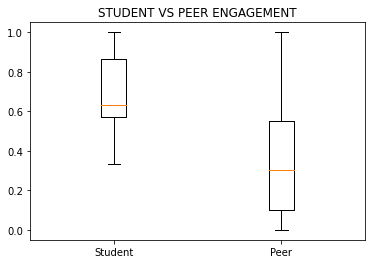

In [77]:
peer_samp_session = peer_samp_session.dropna(subset = ['engagement'])
data = [stu_samp_session['engagement'], peer_samp_session['engagement']]
fig, ax = plt.subplots()

ax.set_title('STUDENT VS PEER ENGAGEMENT')
ax.boxplot(data)
plt.xticks([1, 2], ['Student', 'Peer'])
plt.show()

## Historical Progress Report

Text(0, 0.5, 'RATE')

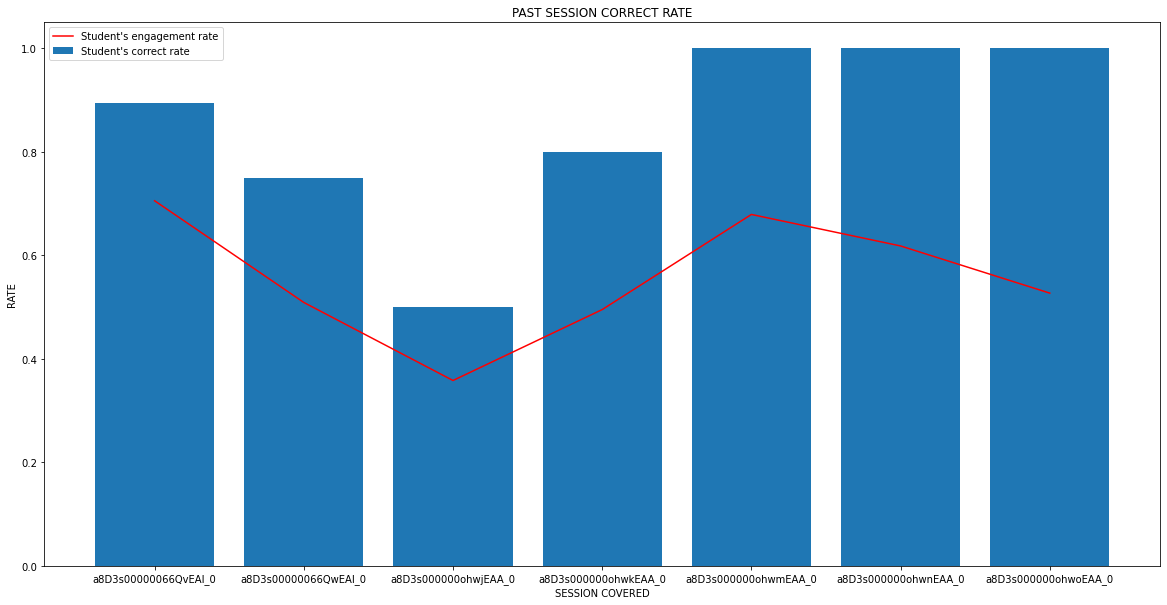

In [82]:
from matplotlib.pyplot import figure
fig, ax = plt.subplots(figsize=(20, 10))
y1 = student_session_event.groupby(['session_id']).engagement.mean()
#y2 = stu_event.dropna().groupby(['session_id']).correct.mean()
y3 = student_session_event.groupby(['session_id']).correct.mean()
X = student_session_event['session_id'].unique()

plt.plot(X,y1,"-r", label="Student's engagement rate")
#plt.plot(X,y2,"-y", label = "Peer inference level")
plt.bar(X ,y3, label="Student's correct rate") # A bar chart
#plt.bar(X ,y2, label="Peer's correct rate")
plt.legend()
plt.title('PAST SESSION CORRECT RATE')
plt.xlabel('SESSION COVERED')
plt.ylabel('RATE')